Лашманов Валентин

In [40]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [41]:
%cd drive/MyDrive/jetland/

/content/drive/MyDrive/jetland


In [43]:
%ls

investor_cashflow.xlsx  loan_table.xlsx  notebook_jetland.ipynb


In [44]:
import pandas as pd
import numpy as np
import scipy.stats as sts

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

### Задание 6

В корзине 85 чёрных мячей и 15 красных. Вы наугад достаёте мяч из корзины, фиксируете результат и возвращаете его обратно. Оцените 95%-доверительный интервал количества вытянутых красных мячей, если повторить опыт 100 раз.

In [30]:
alpha = 0.05
z_alpha = sts.norm().ppf(1 - alpha/2)

In [31]:
z_alpha

1.959963984540054

In [56]:
p_hat = 15/100
[p_hat - z_alpha * np.sqrt((1-p_hat)*p_hat/100), p_hat + z_alpha * np.sqrt((1-p_hat)*p_hat/100)]  #интервал для доли

[0.08001528740942768, 0.2199847125905723]

In [68]:
values = np.array([1, 0]) # 1 - red, 0 - blackk
probabilities = [0.15, 0.85]
distrib = sts.rv_discrete(values=(values, probabilities))

In [69]:
xes = []
for i in range(100):
    x = distrib.rvs(size=100)
    xes.append(x.sum())

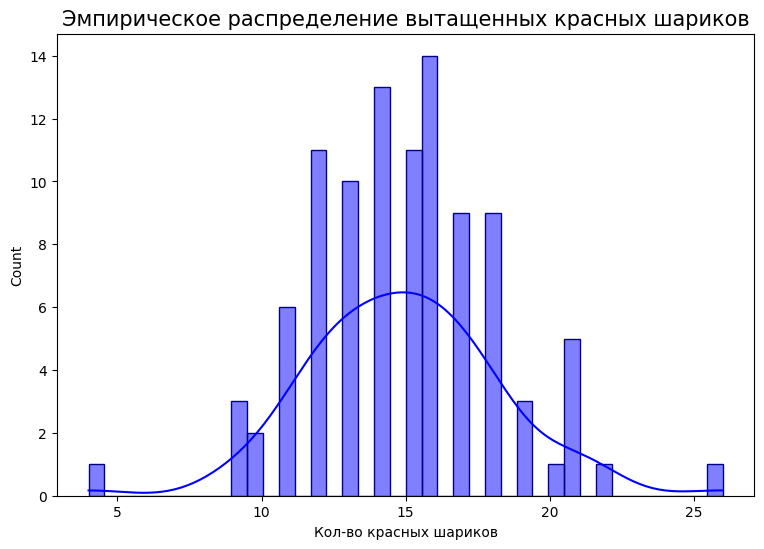

In [70]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Эмпирическое распределение вытащенных красных шариков', fontsize=15)
ax.set_xlabel('Кол-во красных шариков')
sns.histplot(xes,
             bins=40,
             ax=ax,
             color='blue',
             edgecolor='darkblue',
            kde= True); #ф-ия плотности

In [71]:
mu = np.mean(xes)

In [72]:
sigma = np.var(xes)

In [73]:
[mu - z_alpha * sigma/np.sqrt(100), mu + z_alpha * sigma/np.sqrt(100)]

[12.831768923708335, 17.068231076291664]

In [74]:
12 #<- answer

12

### Задание 7

In [38]:
p = 1/400*1/400 # вероятность выбрать одинаковый товар у двух туристов

$C^n_k$ = $C^{40}_2$ = 780 - количество комбинаций из двух туристов

In [39]:
780*p #итоговая вероятность

0.004875

### Задание 8

Крупье бросает игральную шестигранную кость (грани пронумерованы от 1 до 6, выпадение каждой грани равновероятно). Результатом броска является ваш выигрыш — цифра на кости * 100р, соответственно если выпала единица — выигрыш составит 100р, если шестёрка — 600р. Если результат выпадения кубика вас не устроил, то в рамках одной игры вы можете перебросить его N раз, при этом в случае перебрасывания, вы отказываетесь от предыдущего результата. Рассчитайте минимальное число возможных перебрасываний в игре, чтобы игра была статистически выигрышной при следующих условиях:

Входная ставка — 475р

Вы используете оптимальную стратегию игры, нацеленную на максимизацию выигрыша.

In [34]:
values = np.array([0, 1]) # вероятность заработаьь при броске меньше 475 руб, вероятность заработаь 500 либо 600 руб
probabilities = [2/3, 1/3]
distrib = sts.rv_discrete(values=(values, probabilities))

lst = []
for i in range(10**5):
    x = distrib.rvs(size=100)
    index = [i for i, el in enumerate(x) if el > 0]

    num_of_rolls = index[0]+1

    lst.append(num_of_rolls)

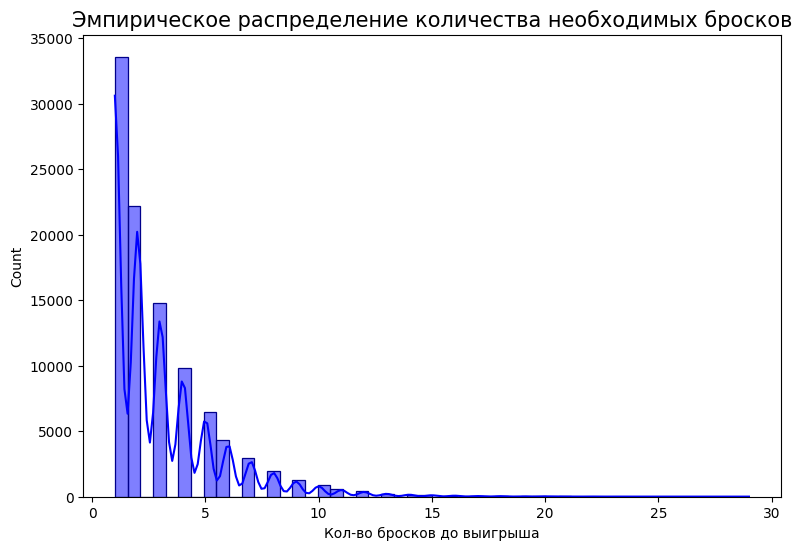

In [35]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Эмпирическое распределение количества необходимых бросков', fontsize=15)
ax.set_xlabel('Кол-во бросков до выигрыша')
sns.histplot(lst,
             bins=50,
             ax=ax,
             color='blue',
             edgecolor='darkblue',
            kde= True); #ф-ия плотности

In [36]:
np.mean(lst)  # то есть в среднем нам нужно кинуть более 2 раз, чтобы результат был статистически выигрышным => нужно кинуть 3 раза

2.9906

### Задание 9

Необходимо рассчитать число активных займов в портфелях инвесторов. В качестве ответа нужно предоставить разницу по модулю этих значений между инвесторами с id = 1 и id = 3.

In [45]:
investor_cashflow = pd.read_excel('investor_cashflow.xlsx')
loan_table = pd.read_excel('loan_table.xlsx')

In [46]:
df = investor_cashflow.merge(loan_table, how = 'left', on = 'loan_id')

In [47]:
print('Число активных займов инвестора с id = 1:',df[(df['investor_id'] == 1) & (df['status'] == 'active')]['loan_id'].nunique())
print('Число активных займов инвестора с id = 3:',df[(df['investor_id'] == 3) & (df['status'] == 'active')]['loan_id'].nunique())
print(86-57) # <- answer

Число активных займов инвестора с id = 1: 86
Число активных займов инвестора с id = 3: 57
29


### Задание 10

Необходимо рассчитать, какую долю от общей суммы каждого займа составляет инвестиция каждого конкретного инвестора.
Среди рассчитанных значений  получить среднее значение по всем займам, а также максимальное значение для займа с id = 3. <br>
В качестве ответа предоставить разницу по модулю двух полученных выше значений (среднего из всех и максимального по займу с id = 3), умножить на 10 000 и взять от полученного числа целую часть.

In [48]:
df10 = df[df['amount_x'] < 0]

In [49]:
df10_1 = df10.groupby(['loan_id', 'investor_id'])['amount_x'].sum().reset_index()

In [50]:
df10_2 = df10_1.merge(loan_table[['loan_id', 'amount']], how='left', on='loan_id')

In [51]:
df10_2['investor_share'] = df10_2['amount_x'] / - df10_2['amount']

In [52]:
df10_2.head()

,loan_id,investor_id,amount_x,amount,investor_share
0,1,4,-1500.0,1500000,0.0010
1,2,1,-26250.0,500000,0.0525
2,3,1,-5250.0,2500000,0.0021
3,3,3,-27500.0,2500000,0.0110
4,3,5,-10000.0,2500000,0.0040


In [53]:
total_mean_10 = df10_2['investor_share'].mean() #среднее значение по всем займам с точки зрения каждого инвестора
# может быть тут стоило складывать доли для каждого займа, но в задании про это ничего не сказано

In [54]:
max_value_id3 = df10_2[df10_2['loan_id'] == 3]['investor_share'].max()

In [55]:
np.round(np.abs(total_mean_10 - max_value_id3)*10000) #<- answer

11.0

### Задание 11

Фактические суммы дохода / потерь инвестора рассчитываются следующим образом: в качестве дохода берётся сумма процентных платежей, а в качестве потерь — неоплаченный остаток долга в случае, если произошёл дефолт. Относительное значение можно получить путём деления рассчитанной суммы на общую сумму инвестированных в займы средств инвестора. В настоящем задании необходимо рассчитать относительное значение дохода (или потерь) инвесторов на конец дня 01.03.2023 по каждому.
Для корректности расчёта стоит обратить внимание на указанную дату, так как часть дефолтов ещё не реализовалась к указанной дате, денежные средства инвесторов ещё не были проинвестированы в займы, выданные после этой даты, а процентный доход после указанной даты не был получен. <br>
В качестве ответа необходимо указать разницу по модулю между максимальным и минимальным значениями относительной доходности среди инвесторов на указанную дату, умножить на 10 000 и использовать для ответа целую часть полученного числа.

In [56]:
df11 = df[df['date'] <= pd.to_datetime('2023-03-01')]  # не учитываем все, что было после этой даты

In [57]:
df11.head()

,investor_id,date,loan_id,amount_x,principal_payment,interest_payment,loan_rate,amount_y,term,status,start_date,date_of_default
0,3,2022-05-01,592,-11000.0,-11000.0,0.0,0.395,1500000,360,closed,2022-05-01,NaT
1,1,2022-05-01,781,-26250.0,-26250.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT
2,3,2022-05-01,781,-11000.0,-11000.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT
3,4,2022-05-01,781,-2500.0,-2500.0,0.0,0.395,1500000,180,closed,2022-05-01,NaT
4,2,2022-05-02,381,-16000.0,-16000.0,0.0,0.206,5000000,360,closed,2022-05-02,NaT


In [58]:
set(df11['investor_id']) # у нас всего 5 инвесторов

{1, 2, 3, 4, 5}

In [59]:
def profitability(df, investor_ids: list):

  result_df = pd.DataFrame(columns = ['investor_id', 'total_investments', 'income', 'losses'])
  for num, investor_id in enumerate(investor_ids):
    inv_df = df[(df['investor_id'] == investor_id)] #таблица для инвестора
    income = inv_df[(inv_df['status'] != 'default') | (inv_df['date_of_default'] > pd.to_datetime('2023-03-01'))]['interest_payment'].sum() #сколько заработал на недефолтных инвестициях

    default_df = inv_df[(inv_df['status'] == 'default') & (inv_df['date_of_default'] <= pd.to_datetime('2023-03-01'))]  #таблица с дефолтными инвестициями инвестора
    default_loans_list = list(set(default_df['loan_id'])) # список займов, для которых случился дефолт

    total_loss = 0
    for loan in default_loans_list:

      loan_loss = default_df[default_df['loan_id']==loan]['principal_payment'].sum() + default_df[default_df['loan_id']==loan]['interest_payment'].sum() #неоплаченный остаток долга по займу
      total_loss += loan_loss

    invested = - inv_df[inv_df['amount_x'] < 0]['amount_x'].sum()  #всего вообще инвестировал

    result_df.loc[int(num)] = [investor_id, invested, income, total_loss]

  return result_df



In [60]:
df_prof = profitability(df11, list(set(df11['investor_id'])))

In [61]:
#не до конца понял фурмулировку условия
#доходность = (сколько заработал на % платежах - сколько потерял из-за дефолта) / сколько инвестировал всего
df_prof['profitability'] = (df_prof['income'] + df_prof['losses']) / df_prof['total_investments']

In [62]:
df_prof

,investor_id,total_investments,income,losses,profitability
0,1.0,8557500.0,817160.927024,-393763.482418,0.049477
1,2.0,6432000.0,327512.225767,-16000.000000,0.048432
2,3.0,9234500.0,583824.662062,-70908.740122,0.055543
3,4.0,793500.0,75141.619968,-30750.598530,0.055943
4,5.0,4370000.0,225079.431545,-8141.561881,0.049643


In [63]:
np.round(np.abs(df_prof['profitability'].max() - df_prof['profitability'].min())*10000) # <-answer

75.0

### Задание 12

Необходимо рассчитать помесячный относительный доход инвесторов аналогично методике, описанной в предыдущем задании с даты начала их инвестирования по конец наблюдений 01.02.2024, построить график, объединяющий доходности разных инвесторов и провести анализ указанных результатов.

Ниже идет неудачная попвтка написать функцию

In [480]:
def monthly_profitability(df, investor_ids: list):

  for num, investor_id in enumerate(investor_ids):
    inv_df = df[(df['investor_id'] == investor_id)] #таблица для инвестора
    inv_df['Month_Year'] = inv_df['date'].dt.to_period('M')

    investor_default_loans = [] # список дефолтных контрактов - обновляется после каждого месяца
    for month in inv_df['Month_Year'].unique():

      inv_month_df = inv_df[inv_df['Month_Year'] == month]  #месячная таблица для инвестора
      invested_this_month = - inv_month_df[inv_month_df['amount_x'] < 0]['amount_x'].sum()  #инвестировал в этом месяце всего

      if inv_month_df[(inv_month_df['status'] == 'default')].shape[0] != 0: #есть инфа о дефолтниках

        last_date_of_month = inv_month_df['date'].values[-1]
        monthly_default_df = inv_month_df[(inv_month_df['status'] == 'default') & (inv_month_df['date_of_default'] <= last_date_of_month)]
        monthly_default_loans_list = list(set(monthly_default_df['loan_id'])) # список займов, для которых случился дефолт в этом месяце

        if monthly_default_loans_list:
          investor_default_loans += [*monthly_default_loans_list]
        print(investor_default_loans)
        #теперь по этим займам должны посчитать убытки относительно начала инвестирования
      income_this_month = inv_month_df[~inv_month_df['loan_id'].isin(investor_default_loans)]['interest_payment'].sum() #сколько заработал на недефолтных инвестициях в этом месяце
      print(investor_id, month, invested_this_month, income_this_month, income_this_month/invested_this_month)
      print('----')
    print('====')

Удачная попытка через генератор:

In [64]:
def profitability_per_month(df, investor_ids: list):
  '''
  Генератор, который для каждого месяца выдает \n
  таблицу доходностей для всех инвесторов
  '''
  for month in df['Month_Year'].unique():

    result_df = pd.DataFrame(columns = ['investor_id', 'total_investments', 'income', 'losses'])
    for num, investor_id in enumerate(investor_ids):
      inv_df = df[(df['investor_id'] == investor_id)] #таблица для инвестора
      income = inv_df[(inv_df['status'] != 'default') | (inv_df['Month_Year'] > month)]['interest_payment'].sum() #сколько заработал на недефолтных инвестициях

      default_df = inv_df[(inv_df['status'] == 'default') & (inv_df['Month_Year'] <= month)]  #таблица с дефолтными инвестициями инвестора
      default_loans_list = list(set(default_df['loan_id'])) # список займов, для которых случился дефолт

      total_loss = 0
      for loan in default_loans_list:

        loan_loss = default_df[default_df['loan_id']==loan]['principal_payment'].sum() + default_df[default_df['loan_id']==loan]['interest_payment'].sum() #неоплаченный остаток долга по займу
        total_loss += loan_loss

      invested = - inv_df[inv_df['amount_x'] < 0]['amount_x'].sum()  #всего вообще инвестировал

      result_df.loc[int(num)] = [investor_id, invested, income, total_loss]

    result_df['month'] = month
    result_df['profitability'] = (result_df['income'] + result_df['losses']) / result_df['total_investments']

    yield result_df

In [68]:
df['Month_Year'] = df['date'].dt.to_period('M')

In [69]:
ids = [1,2,3,4,5] # в датасете всего 5 инвесторов
gen = profitability_per_month(df, ids)

In [70]:
total_df = pd.DataFrame()
for table in gen:
  total_df = pd.concat([total_df, table], axis=0)

In [71]:
total_df['month'] = total_df['month'].astype(str).apply(lambda x: x + '-01')
total_df['month'] = pd.to_datetime(total_df['month'])
total_df['investor_id'] = total_df['investor_id'].astype(int)

In [72]:
fig = px.line(total_df, x="month", y="profitability", color='investor_id', markers=True)
fig.update_layout(
    title=dict(text="Помесячный относительный доход инвесторов", font=dict(size=30), automargin=True, yref='paper'))
fig.show()

- Из графика можно сделать вывод, что самыми успешными оказались инвесторы с id=4 и id=1. Их доходность изначально составляла более 15%, однако затем начала снижаться. А после апреля 2023 начала расти, но маленькими темпами.  
- У остальных инвесторов доходность оставалась примерно на одном уровне в течение всего периода.

In [73]:
start_month = total_df['month'].iloc[0]
total_df['month_since_start'] = total_df['month'] - start_month
total_df['month_since_start'] = np.round(total_df['month_since_start']/ np.timedelta64(1, 'M'))
final_df = total_df[['investor_id', 'month_since_start', 'profitability']]

In [76]:
final_df.to_excel('final_dataframe.xlsx', index=False)

Строим график с номером месяца на основе финальной таблицы

In [77]:
fig = px.line(final_df, x="month_since_start", y="profitability", color='investor_id', markers=True)
fig.update_layout(
    title=dict(text="Помесячный относительный доход инвесторов", font=dict(size=30), automargin=True, yref='paper'))
fig.show()